# Use Case : Astra Credit Scoring

## 1. Introduction

### Informasi Data
Data berisi informasi terkait pelanggan kartu kredit di suatu negara pada periode Januari - Maret 2015. Informasi meliputi latar belakang pelanggan, jumlah tagihan, jumlah pembayaran, lama terlambat bayar dan status pembayaran bulan berikutnya (April 2015).

### Tujuan Pemodelan
Memprediksi apakah pelanggan kartu kredit beresiko terlambat bayar pada bulan April 2015 berdasarkan data pada bulan Januari - Maret 2015 pada data testing.

### Deskripsi Features
Terdapat 16 peubah yang terdiri dari ID, 14 prediktor dan 1 target. <br>
**ID** --> Nomor urut --> character <br>
**AGE** --> Umur --> Kontinyu (tahun) <br>
**LIMIT_BAL** --> Batas maksimal kredit --> Kontinyu (USD) <br>
**EDUCATION** --> Tingkat pendidikan -->Kategorik <br>
1: S2/S3 <br>
2: Dipl/S1 <br>
3: SMA <br>
4: Lainnya <br>
**MARRIAGE** --> Status Pernikahan --> Kategorik <br>
1: Belum Menikah <br>
2: Menikah <br>
3: Lainnya <br>
**SEX** --> Nomor urut --> Kategorik <br>
1: Pria <br>
2: Wanita <br>
**PAY_1 … 3** --> Umur --> Kategorik <br>
0: Tepat waktu <br>
1: Terlambat 1 bulan, dst <br>
**BILL_AMT1 … 3** --> Jumlah tagihan --> Kontinyu (USD) <br>
**PAY_AMT1 …3**	--> Jumlah yang harus dibayarkan --> Kontinyu (USD) <br>
**TARGET** --> Umur --> Kategorik <br>
1: Terlambat <br>
0: Tidak terlambat <br>

## 2. Librarys
a. Importing Librarys <br>
b. Importing Dataset <br>

In [3]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

In [4]:
# Importing the data
training = pd.read_csv('training.csv')

## 3. Look at the Dataset
a. Looking the Type of Data <br>
b. Missing Values Detection <br>
c. Unique values <br>

In [5]:
# Data Type

# Searching for Missings,type of data and also known the shape of data
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.0 MB


In [6]:
# Missing Values Detection

pct_mv = round(training.isnull().sum()/len(training)*100,2).sort_values(ascending = False)
pct_mv.head(16)

TARGET       0.0
PAY_AMT3     0.0
PAY_AMT2     0.0
PAY_AMT1     0.0
BILL_AMT3    0.0
BILL_AMT2    0.0
BILL_AMT1    0.0
PAY_3        0.0
PAY_2        0.0
PAY_1        0.0
AGE          0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
LIMIT_BAL    0.0
ID           0.0
dtype: float64

**Missing Values Detection** <br>
Dari hasil code di atas terlihat bahwa tidak ditemukan adanya missing values. Sehingga seluruh dataset yang diberikan sudah bersih dan objek datanya terisi penuh.

In [7]:
# Looking for unique values

print(training.nunique())

ID           16625
LIMIT_BAL       76
MARRIAGE         3
EDUCATION        4
SEX              2
AGE             52
PAY_1            5
PAY_2            5
PAY_3            5
BILL_AMT1    13364
BILL_AMT2    13201
BILL_AMT3    12939
PAY_AMT1      5138
PAY_AMT2      5039
PAY_AMT3      4892
TARGET           2
dtype: int64


In [8]:
# Looking for the first 5 dataset

training.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


## 4. Data Exploration
a. Numerical and Categorical Variable <br>
b. Statistika deskriptif data Numerical <br>
c. Outliers Detection <br>
d. TARGET feature distribution <br>
e. TARGET vs. EDUCATION distribution <br>
f. TARGET vs. MARRIAGE distribution <br>

### Numerical vs. Categorical Variable

In [9]:
# Change data type

#training['MARRIAGE'] = training['MARRIAGE'].astype(str)
#training['EDUCATION'] = training['EDUCATION'].astype(str)
#training['SEX'] = training['SEX'].astype(str)
#training['PAY_1'] = training['PAY_1'].astype(str)
#training['PAY_2'] = training['PAY_2'].astype(str)
#training['PAY_3'] = training['PAY_3'].astype(str)
#training['TARGET'] = training['TARGET'].astype(str)

# Define the categorical variable
categorical = training[['MARRIAGE','EDUCATION','SEX','PAY_1','PAY_2','PAY_3','TARGET']]
categorical.head()

,MARRIAGE,EDUCATION,SEX,PAY_1,PAY_2,PAY_3,TARGET
0,1,1,2,0,0,0,0
1,1,1,2,1,2,0,0
2,1,1,2,0,0,0,0
3,1,1,2,0,0,0,0
4,1,1,2,0,0,0,0


In [10]:
# Numerical vs. Categorical Variable

# Mendefinisikan numerical variable
numerical = training.drop(categorical, axis=1)
numerical.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,40,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0
1,2,20000.0,41,17040.0,16474.0,17203.0,0.0,1300.0,1500.0
2,3,20000.0,36,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0
3,4,20000.0,35,2003.0,2948.0,3372.0,1086.0,1000.0,0.0
4,5,170000.0,38,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0


In [11]:
# Statistika Deskriptif

# Statistika Deskriptif Numerical Variabel
numerical.drop('ID', axis = 1).describe().round(0)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
count,16625.0,16625.0,16625.0,16625.0,16625.0,16625.0,16625.0,16625.0
mean,157609.0,43.0,50721.0,48816.0,46471.0,5175.0,4974.0,4830.0
std,124931.0,9.0,73365.0,70753.0,68183.0,15034.0,14867.0,15646.0
min,0.0,20.0,-165580.0,-69777.0,-61506.0,0.0,0.0,0.0
25%,50000.0,37.0,3491.0,2997.0,2550.0,566.0,451.0,306.0
50%,120000.0,42.0,21943.0,20987.0,19954.0,2000.0,2000.0,1637.0
75%,230000.0,49.0,65903.0,62725.0,59111.0,5000.0,4696.0,4025.0
max,800000.0,72.0,746814.0,646770.0,693131.0,505000.0,384986.0,508229.0


**Statistical Descriptive Insight** <br>
Dari tabel di atas terlihat bahwa rata-rata nasabah pelaku kredit berusia 43 tahun. Umumnya pada usia tersebut seseorang sudah matang secara karir dan finansial, sehingga diharapkan bahwa karakteristik nasabah pelaku kredit memiliki risiko rendah. Selanjutnya jika dilihat lebih detail, terdapat gap yang bisa dibilang sangat jauh antara kuartil 3 (75%) dan maksimumnya. Hal tersebut terjadi pada seluruh numerical variables. Sehingga dapat dipastikan bahwa pada seluruh features tersebut terdapat banyak sekali pencilan (outliers) atas. Anggapan ini dapat diperkuat setelah ditampilkan boxplot untuk features tersebut.

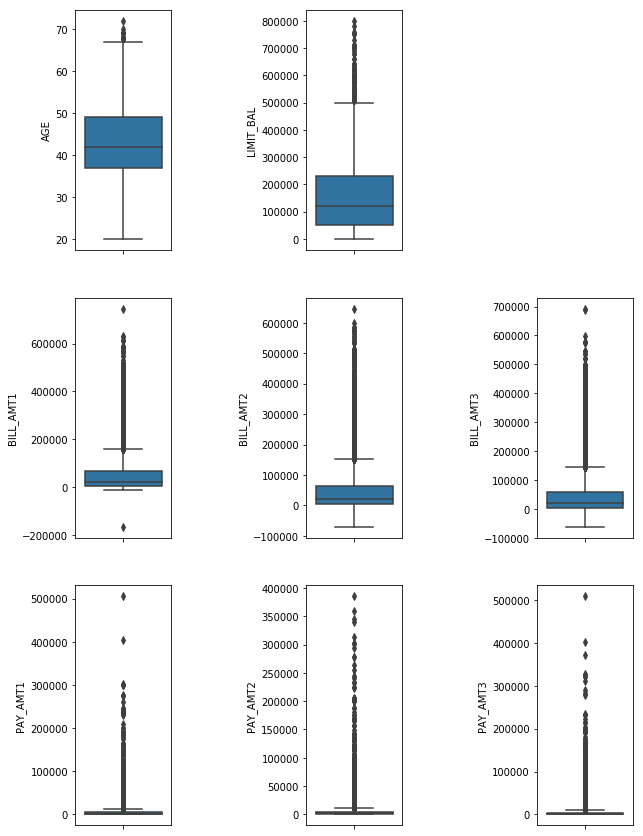

In [12]:
# Menampilkan boxplot dari numerical variable

f = plt.figure(figsize=(10,15))

f.add_subplot(3,5,1)
sns.boxplot(y=numerical['AGE'])

f.add_subplot(3,5,3)
sns.boxplot(y=numerical['LIMIT_BAL'])

f.add_subplot(3,5,6)
sns.boxplot(y=numerical['BILL_AMT1'])

f.add_subplot(3,5,8)
sns.boxplot(y=numerical['BILL_AMT2'])

f.add_subplot(3,5,10)
sns.boxplot(y=numerical['BILL_AMT3'])

f.add_subplot(3,5,11)
sns.boxplot(y=numerical['PAY_AMT1'])

f.add_subplot(3,5,13)
sns.boxplot(y=numerical['PAY_AMT2'])

f.add_subplot(3,5,15)
sns.boxplot(y=numerical['PAY_AMT3'])

**Boxplot Numerical Variables** <br>
Dari boxplot di atas, membuktikan bahwa anggapan yang ada pada statistical descriptive numerical variables terjawab dengan tepat. Terlihat jelas bahwa pada seluruh numerical variables terdapat banyak sekali pencilan (outliers) atas. <br>
Pada credt scoring case study ini, outliers tidak dapat dibuang, dikarenakan outliers ini justru data yang penting untuk dilakukan analisis pada credit scoring guna melihat karakteristik dari pencilan tersebut.

Text(0,0.5,'')

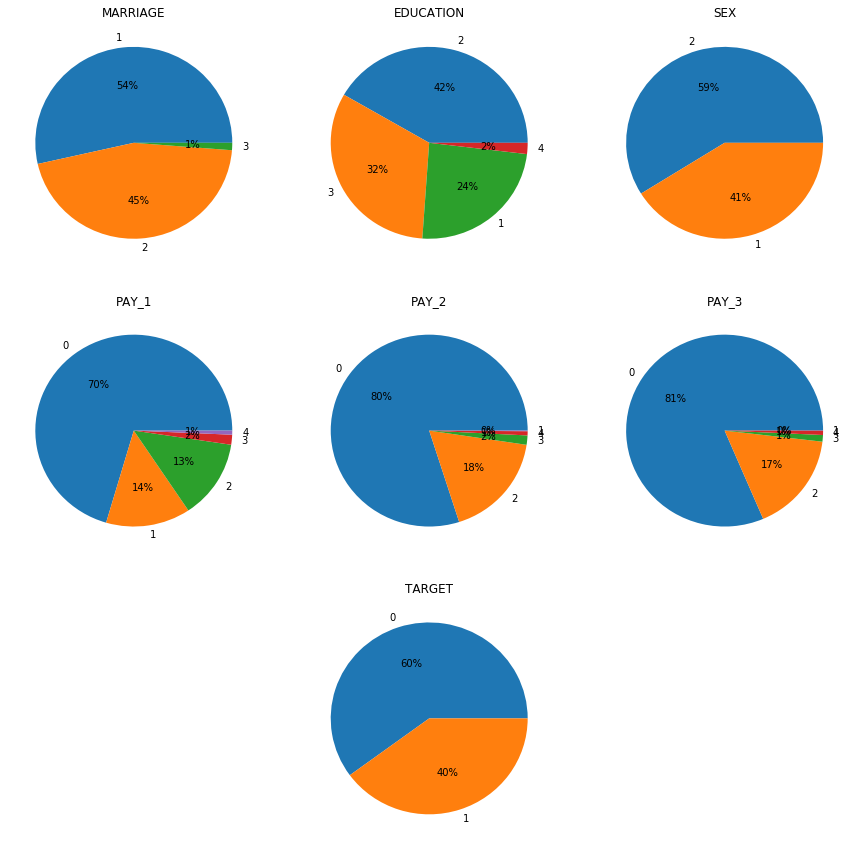

In [13]:
# Menampilkan boxplot dari categorical variable

# Menampilkan subplot dari masing-masing features kategorik
f = plt.figure(figsize=(15,15))

f.add_subplot(3,3,1)
categorical['MARRIAGE'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('MARRIAGE')
plt.ylabel('')

f.add_subplot(3,3,2)
categorical['EDUCATION'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('EDUCATION')
plt.ylabel('')

f.add_subplot(3,3,3)
categorical['SEX'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('SEX')
plt.ylabel('')

f.add_subplot(3,3,4)
categorical['PAY_1'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('PAY_1')
plt.ylabel('')

f.add_subplot(3,3,5)
categorical['PAY_2'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('PAY_2')
plt.ylabel('')

f.add_subplot(3,3,6)
categorical['PAY_3'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('PAY_3')
plt.ylabel('')

f.add_subplot(3,3,8)
categorical['TARGET'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('TARGET')
plt.ylabel('')

**Categorical Variables Pie Charts** <br>
Dari pie charts di atas terlihat bahwa mayoritas nasabah pelaku kredit adalah seseorang yang berstatus **belum menikah**, berpendidikan **dipl/S1**, dan berjenis kelamin **wanita**. Kemudian jika dilihat dari keberjalanan kredit selama 3 bulan tersebut perilaku dari nasabah pelaku kredit ini dapat dibilang sangat positif. Dikarenakan sekitar 70% - 80% pelaku kredit tidak terlambat membayar tagihan atau dapat dikatakan rata-rata 60% pelaku kredit **tidak terlambat** membayar tagihan. Angka tersebut cukup signifikan dibandingkan dengan pelaku nasabah yang terlambat membayar. Sehingga dapat dikatakan bahwa dari sampel dataset ini kredit yang dijalankan oleh perusahaan berjalan dengan sehat.

In [14]:
!pip install plotly

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [15]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

In [16]:
# Plot Target Distribution (Terlambat vs. Tidak Terlambat)

# First plot
trace0 = go.Bar(
            x = training[training['TARGET'] == 1]['TARGET'].value_counts().index.values,
            y = training[training['TARGET'] == 1]['TARGET'].value_counts().values,
            name='Telambat')

# Second plot
trace1 = go.Bar(
            x = training[training['TARGET'] == 0]['TARGET'].value_counts().index.values,
            y = training[training['TARGET'] == 0]['TARGET'].value_counts().values,
            name='Tidak Terlambat')

data = [trace0, trace1]
layout = go.Layout(yaxis=dict(title='Count'),
                   xaxis=dict(title='Risk Variable'),
                   title='Target Feature Distribution')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Target-Barplot', image_width=5, image_height=5)

**Target Feature Distribution** <br>
Dari target feature distribution terlihat bahwa **lebih banyak** nasabah yang **tidak terlambat** melakukan pembayaran daripada **terlambat** melakukan pembayaran.

In [17]:
# Target vs. Education Plot

# First plot
trace0 = go.Bar(
    x = training[training['TARGET']== 1]['EDUCATION'].value_counts().index.values,
    y = training[training['TARGET']== 1]['EDUCATION'].value_counts().values,
    name='Terlambat')

# Second plot
trace1 = go.Bar(
    x = training[training['TARGET']== 0]['EDUCATION'].value_counts().index.values,
    y = training[training['TARGET']== 0]['EDUCATION'].value_counts().values,
    name='Tidak Terlambat')

data = [trace0, trace1]
layout = go.Layout(xaxis=dict(title='Education'),
                   yaxis=dict(title='Count'),
                   title='Target vs. Education Distribution')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='TargetvsEducation-Grouped', image_width=5, image_height=5)

**Target vs. Education Distribution** <br>
Dari barplot di atas dapat dilihat bahwa mayoritas nasabah pelaku kredit adalah seseorang yang berpendidikan **dipl/S1** dan mayoritas diantaranya **tidak terlambat** membayar tagihan.

In [18]:
# Target vs. Marriage Plot

# First plot
trace0 = go.Bar(
    x = training[training['TARGET']== 1]['MARRIAGE'].value_counts().index.values,
    y = training[training['TARGET']== 1]['MARRIAGE'].value_counts().values,
    name='Terlambat')

# Second plot
trace1 = go.Bar(
    x = training[training['TARGET']== 0]['MARRIAGE'].value_counts().index.values,
    y = training[training['TARGET']== 0]['MARRIAGE'].value_counts().values,
    name='Tidak Terlambat')

data = [trace0, trace1]
layout = go.Layout(xaxis=dict(title='Marriage'),
                   yaxis=dict(title='Count'),
                   title='Target vs. Marriage Distribution')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='TargetvsMarriage-Grouped', image_width=5, image_height=5)

**Target vs. Marriage Distribution** <br>
Dari barplot di atas dapat dilihat bahwa mayoritas nasabah pelaku kredit adalah seseorang yang berstatus **belum menikah** dan mayoritas diantaranya **tidak terlambat** membayar tagihan.

## 5. Correlation
Looking the data correlation

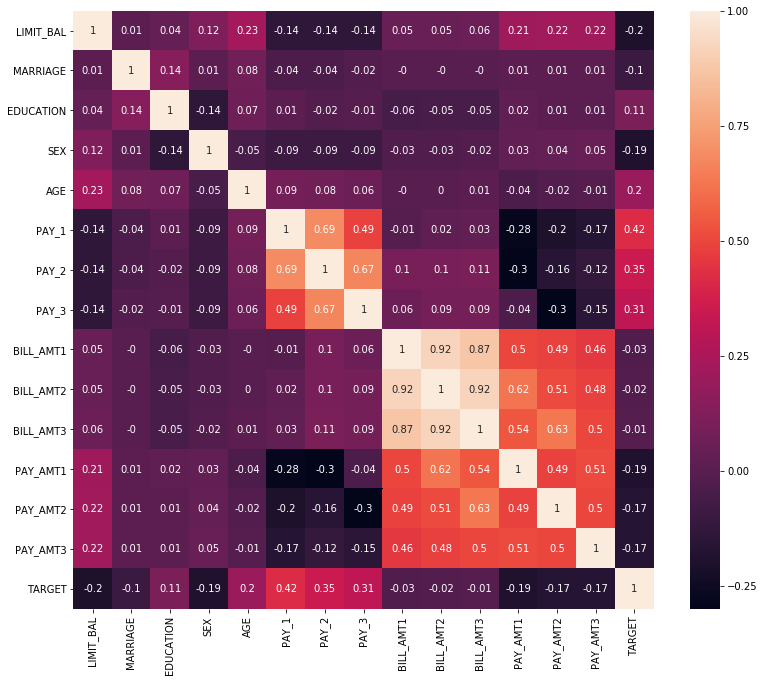

In [19]:
# Create data for correlation
training1 = training.drop('ID', axis = 1)

# Create Correlation heatmap
plt.figure(figsize=(13,11))
sns.heatmap(training1.corr(method = 'spearman').round(2),annot=True)

**Correlation** <br>
Dari correlation heatmap di atas dapat dikatakan bahwa features yang memiliki korelasi erat dengan **target** adalah terlambat/tidaknya seseorang **membayar tagihan pada bulan pertama**. Jadi dapat dikatakan bahwa prediksi apakah seseorang itu mampu untuk melakukan kredit atau tidak sudah dapat dilihat sejak pembayaran tagihan pertamanya. Namun sebenarnya jika dilihat dari nilai korelasinya masih rendah, karena berada dibawah 0.5. <br>
Kemudian jika melihat korelasi antar variabelnya adalah (1) tagihan pertama dengan tagihan kedua serta (2) tagihan kedua dengan tagihan ketiga. Dari korelasi tersebut dapat dikatakan bahwa nominal tagihan berikutnya sangat dipengaruhi oleh nominal tagihan sebelumnya. Dengan artian nominal tagihan berikutnya tidak akan jauh dari nominal tagihan sebelumnya. <br>
Yang terakhir, korelasi antar variabel yang dapat dikatan cukup kuat adalah (1) pembayaran bulan pertama dengan pembayaran bualn kedua serta (2) pembayaran bulan kedua dengan pembayaran bulan ketiga. Dari korelasi tersebut terlihat bahwa terdapat pengaruh pembayaran bulan sebelumnya terhadap pembayaran bulan berikutnya. Sehingga jika pada bulan sebelumnya pelaku kredit tidak terlambat dalam membayar tagihan, maka dia memiliki peluang yang cukup besar bahwa pada bulan selanjutnya dia juga tidak akan terlambat dalam membayarkan tagihannya.

## 6. Credit Scoring with RandomForest Method

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, recall_score, precision_score, roc_auc_score

def plot_rocCurve(aClf, X_test,y_test, modelName):
    roc_auc = roc_auc_score(y_test,aClf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, aClf.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr,tpr,color='green',label='Under curve values = %0.2f' %roc_auc)
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Plot')
    plt.legend(loc='lower right')
    plt.show()

### Defining x and y

In [21]:
#definition X and Y
X = training[['EDUCATION','AGE','PAY_1','PAY_2','PAY_3']] #select feature which has highest impact for TARGET
y = training['TARGET']

### Splitting x and y into train and test

In [22]:
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #test 30% dan train 70%

### Create Gaussian Classifier and Train The Model using y_pred

In [23]:
#Create a Gaussian Classifier
#Tuning
#clf=RandomForestClassifier(random_state=20)
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

### Model Accurancy

In [24]:
# Model Accuracy, how often is the classifier correct?
print("Akurasi dari model RandomForest adalah %.2f" % metrics.accuracy_score(y_test, y_pred))
print("Recall dari model RandomForest adalah %.2f" % metrics.recall_score(y_test, y_pred))
print("Precision dari model RandomForest adalah %.2f" % metrics.precision_score(y_test, y_pred))
print("AUC dari model RandomForest adalah %.2f" % metrics.roc_auc_score(y_test, y_pred))

Akurasi dari model RandomForest adalah 0.79
Recall dari model RandomForest adalah 0.62
Precision dari model RandomForest adalah 0.81
AUC dari model RandomForest adalah 0.76


In [25]:
#make matrix true positive, true negative, false positive, false negative
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[2203,  253],
       [ 640, 1061]], dtype=int64)

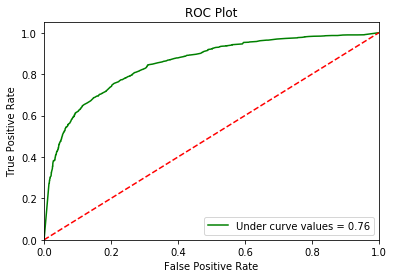

In [26]:
plot_rocCurve(clf, X_test, y_test, modelName='Random Forest')

## 7. Testing The Model to Testing Dataset

### Load Dataset

In [27]:
#import data
testing = pd.read_csv('testing.csv',delimiter=';')
testing = testing.drop(columns=['ID'], axis=1) 
testing.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


### Checking Testing Dataset

In [28]:
testing.shape

(16625, 14)

In [29]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 14 columns):
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
dtypes: float64(7), int64(7)
memory usage: 1.8 MB


In [30]:
pct_mv = round(testing.isnull().sum()/len(testing)*100,2).sort_values(ascending = False)
pct_mv.head(14)

PAY_AMT3     0.0
PAY_AMT2     0.0
PAY_AMT1     0.0
BILL_AMT3    0.0
BILL_AMT2    0.0
BILL_AMT1    0.0
PAY_3        0.0
PAY_2        0.0
PAY_1        0.0
AGE          0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
LIMIT_BAL    0.0
dtype: float64

**Missing Values Detection on Testing Dataset** <br>
Tidak ditemukan adanya missing values pada dataset testing. Sehingga tidak perlu ada objek ataupun tupple yang harus dihapus sebelum melakukan testing model randomforest.

### Testing The Model

In [31]:
#Create a Gaussian Classifier
#Tuning
#clf=RandomForestClassifier(random_state=20)
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X,y)

xTest = testing[['EDUCATION','AGE','PAY_1','PAY_2','PAY_3']]

y_pred=clf.predict(xTest)
y_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

### Testing Results

In [32]:
testing['TARGET'] = pd.Series(y_pred)
testing.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0
1,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,1
2,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0
3,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0


In [33]:
testing.tail()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
16620,350000.0,1,2,1,56,2,2,2,2500.0,2500.0,2500.0,0.0,0.0,0.0,1
16621,380000.0,2,2,1,60,2,2,2,77708.0,79384.0,77519.0,3500.0,0.0,7000.0,1
16622,340000.0,2,2,1,56,3,2,0,3356.0,2758.0,20878.0,0.0,22000.0,4200.0,1
16623,430000.0,1,1,1,61,0,0,0,78379.0,76304.0,52774.0,3409.0,1178.0,1926.0,1
16624,410000.0,1,2,1,61,0,0,0,48905.0,49764.0,36535.0,1800.0,1430.0,1000.0,1


In [34]:
testing.shape

(16625, 15)

### Saving The Results to .csv

In [35]:
testing.to_csv('Testing Result Credit Scoring.csv')

### Visualization The Results

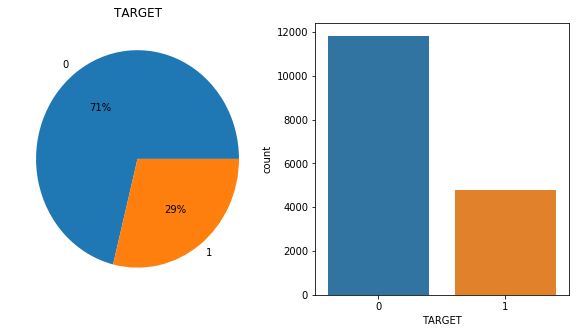

In [36]:
# Menampilkan Pie Chart dan countplot dari Testing Target

f = plt.figure(figsize=(10,5))

f.add_subplot(1,2,1)
testing['TARGET'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('TARGET')
plt.ylabel('')

f.add_subplot(1,2,2)
sns.countplot(testing['TARGET'])

**Testing Results** <br>
Dari visualisasi di atas dapat dilihat bahwa 70% nasabah pelaku kredit pada data testing tidak terlambat dalam membayar tagihannya. Sehingga dapat dikatakan bahwa model yang telah dibuat dapat merepresentasikan data credit scoring astra dengan baik. Sebab hasil yang ditunjukkan antara dataset training dengan dataset testing tidak kontradiksi. Sehingga model yang dibangun dapat diaplikasikan pada dataset yang lebih besar pada astra. Selain itu dari training dataset dan testing dataset dapat dikatakan juga pada astra sejauh ini masih beroperasi dengan sangat sehat dan credit scoring yang diterapkan sudah mampu memberikan profit yang baik terhadap perusahaan dengan cukup rendahnya tingkat keterlambatan pembayaran tagihan dari nasabah pelaku kreditnya. Kemudian dengan pengaplikasian model ini maka astra dapat dengan cermat melakukan approval pada pengajuan kredit untuk meminimalisir risiko yang ditimbulkan dari adanya pengajuan kredit.